In [2]:
#Definir FUNCIÓN que me permitirá importar un archivo CSV y cargarlo en un DataFrame de pandas
def import_csv(file):
    # Read the csv file into a DataFrame: df con el paquete pandas
    import pandas as pd  #Python llama a paquetería pandas 
    return pd.read_csv(file)
#Utilizar el nombre de la FUNCIÓN PREdefinida y la ruta de acceso (path) al archivo .csv de interés
import_csv("C:/Projects/modelab_jp/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")
terminos_df = import_csv("C:/Projects/modelab_jp/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

In [3]:
terminos_df.columns  #Visualizar los nombres de las columnas del DataFrame

Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')

In [8]:
variables = [
    'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
    'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
    'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
    'ta_micromol_kg', 'dummy_data'
]

In [9]:
# Selec the columns we want to use

terminos_df_variables = terminos_df[variables]

# Print df head to check
print(terminos_df_variables.head())

   chlorophy_microg_l  cond_microsiemens_cm  depth_m  do_percent_sat  do_mg_l  \
0                0.36                7015.4    0.464            93.9     7.12   
1                4.19               29886.1    7.792            70.1     4.90   
2                0.92               16691.1    0.453            95.9     6.99   
3                2.23               24847.4    1.261            91.5     6.52   
4                0.58               46341.6    0.465            93.4     6.24   

   sal_psu  sp_cond_microsiemens_cm  turbidity_fnu  temp_c  latitude  \
0     3.56                   6547.7           1.47  28.740  18.55736   
1    16.97                  27751.2          95.33  29.028  18.55722   
2     8.94                  15429.1           5.50  29.283  18.61007   
3    13.87                  23074.0          13.44  29.024  18.61005   
4    28.06                  43670.8           3.60  28.202  18.63166   

   longitude  dic_micromol_kg  ta_micromol_kg  dummy_data  
0  -91.25012        

In [10]:
#Calculate the Spearman correlation matrix
corr_matrix = terminos_df_variables.corr(method='spearman')

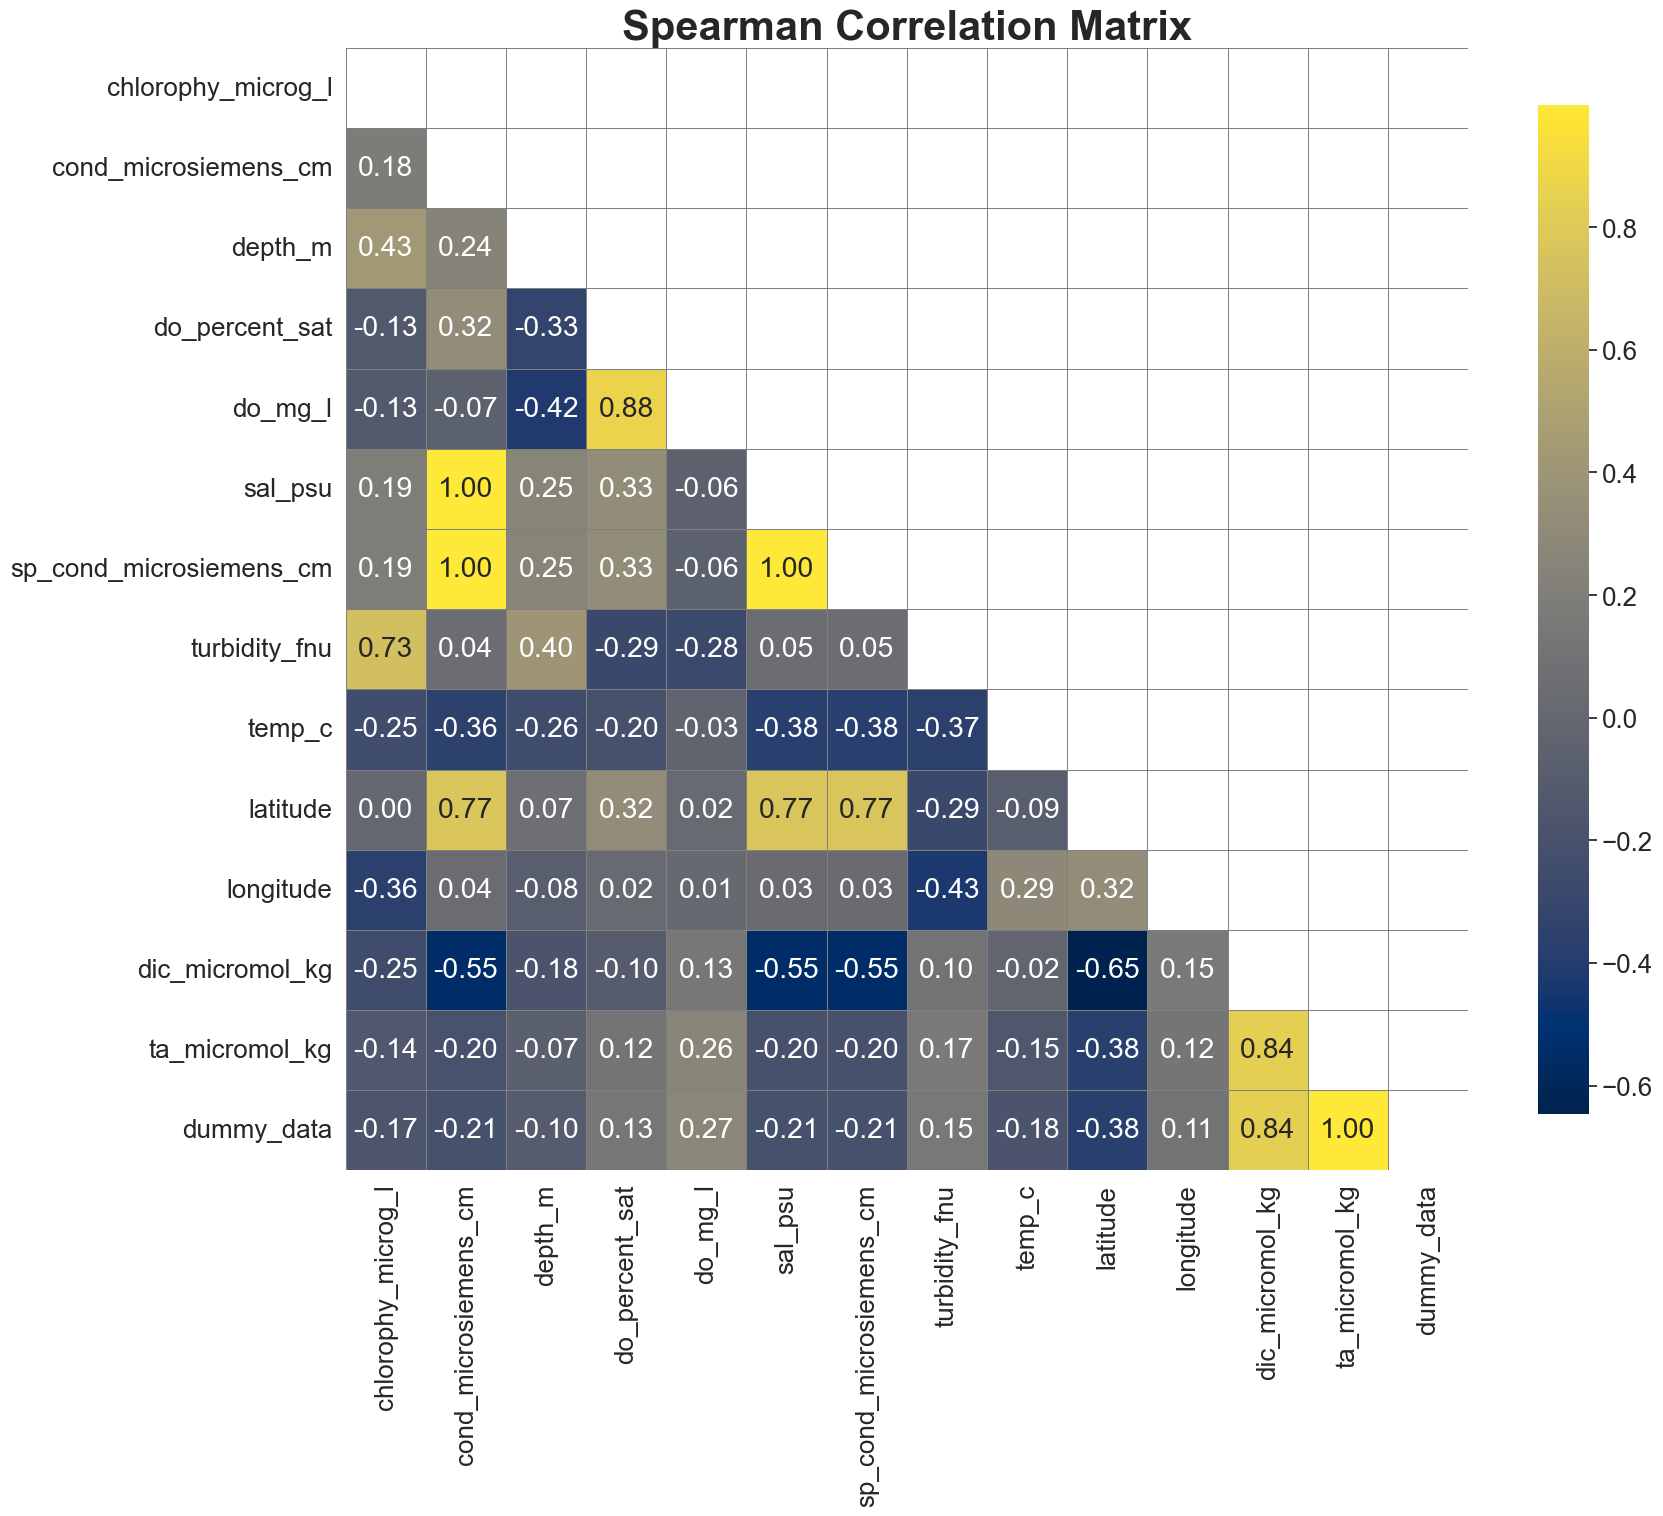

In [31]:
# Plot the Spearman correlation matrix

import matplotlib.pyplot as plt     
import seaborn as sns # For advanced plotting
import numpy as np  # For numerical operations

## Crear una máscara para la mitad superior del heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap 
plt.figure(figsize=(18, 16))
sns.set(style="white", font_scale=1.7)
sns.heatmap(corr_matrix,
            mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='cividis', 
            square=True, 
            linewidths=0.5, 
            linecolor='gray',
            cbar_kws={'shrink': 0.8})

plt.title('Spearman Correlation Matrix', fontsize=30, weight='bold')
plt.tight_layout()
plt.show()